In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [36]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.2195 - accuracy: 0.9358 - val_loss: 0.0949 - val_accuracy: 0.9696
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0805 - accuracy: 0.9754 - val_loss: 0.0944 - val_accuracy: 0.9710
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0517 - accuracy: 0.9834 - val_loss: 0.0642 - val_accuracy: 0.9798
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0741 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0690 - val_accuracy: 0.9802
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0641 - val_accuracy: 0.9802
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0665 - val_accuracy: 

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08826006203889847
Test accuracy: 0.9799000024795532


In [39]:
import numpy as np
import matplotlib.pyplot as plt
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


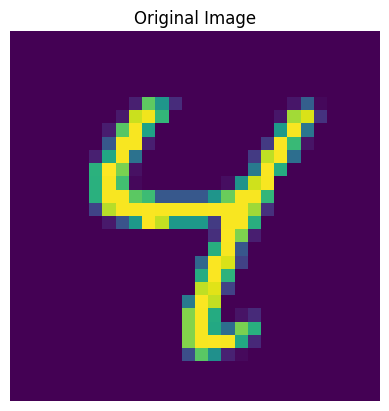

In [40]:
original_image = x_test[6]


original_image = original_image.reshape(28, 28)

plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")
plt.show()


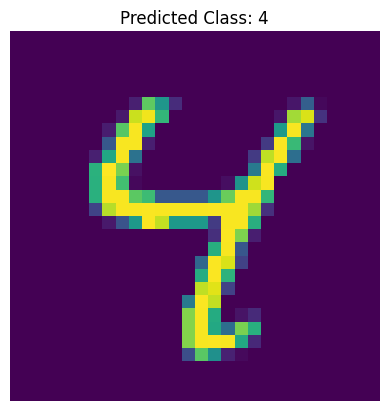

In [41]:

predicted_label = np.argmax(predictions[6])
plt.imshow(original_image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis("off")
plt.show()
